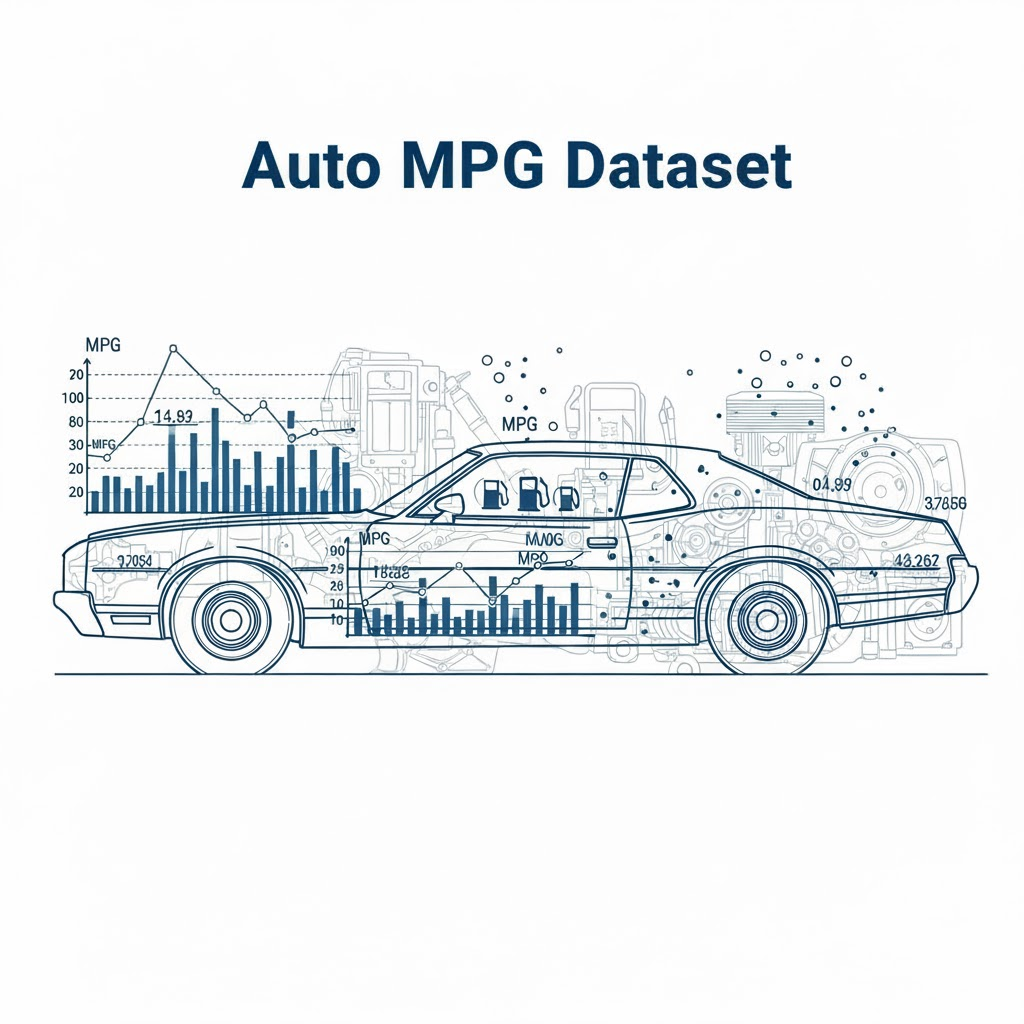

In [57]:
# Importing The dataset Direct From The Kaggle Hub
import kagglehub


# Download latest version
path = kagglehub.dataset_download("uciml/autompg-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'autompg-dataset' dataset.
Path to dataset files: /kaggle/input/autompg-dataset


In [58]:
# ============================
# 📦 CORE DATA HANDLING
# ============================
import numpy as np
import pandas as pd

# ============================
# 📊 DATA VISUALIZATION
# ============================
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# 🤖 MACHINE LEARNING MODELS
# ============================
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# XGBoost Model
from xgboost import XGBRFRegressor

# ============================
# 🧪 MODEL EVALUATION
# ============================
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# ============================
# ⚠️ WARNINGS
# ============================
import warnings
warnings.filterwarnings('ignore')

# Importing Pickle For saving Best MAChine Learning Model
import pickle

In [59]:
# Loading The Dataset
df = pd.read_csv(f"{path}/auto-mpg.csv")


In [60]:
# Printing First 5 Rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [61]:
# Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [62]:
#Statistical Analysis
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [63]:
# Finding Is There Any Duplicates Values
df.duplicated().sum()

np.int64(0)

In [64]:
# we Found That IN Hourse Power There Are Strings WE Conveting The "?" Into The null Values
df = df.replace('?',np.nan)
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [65]:
# droping The Car Name Column
df.drop('car name',axis =1,inplace = True)

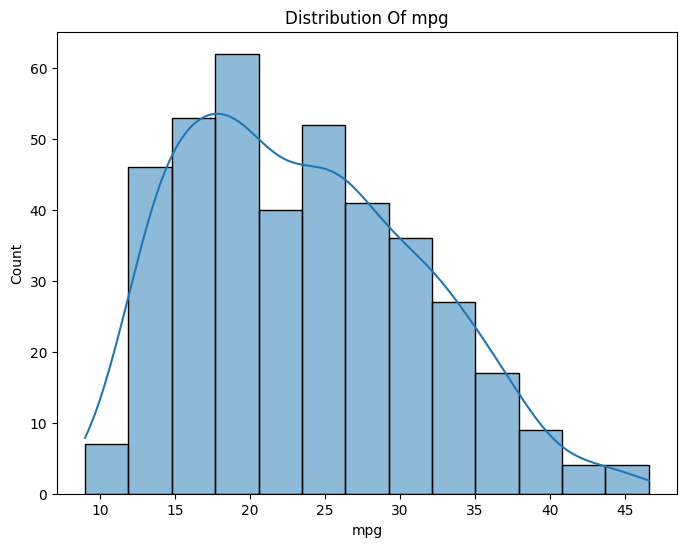

In [66]:
# Checking The Distribution Of The Mpg Column-Target-Column
plt.figure(figsize = (8,6))
sns.histplot(df['mpg'],kde = True)
plt.title('Distribution Of mpg')
plt.show()

In [67]:
#converting int into the float for analysis
numeric_col = ['mpg','horsepower','weight','acceleration']
df[numeric_col]= df[numeric_col].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


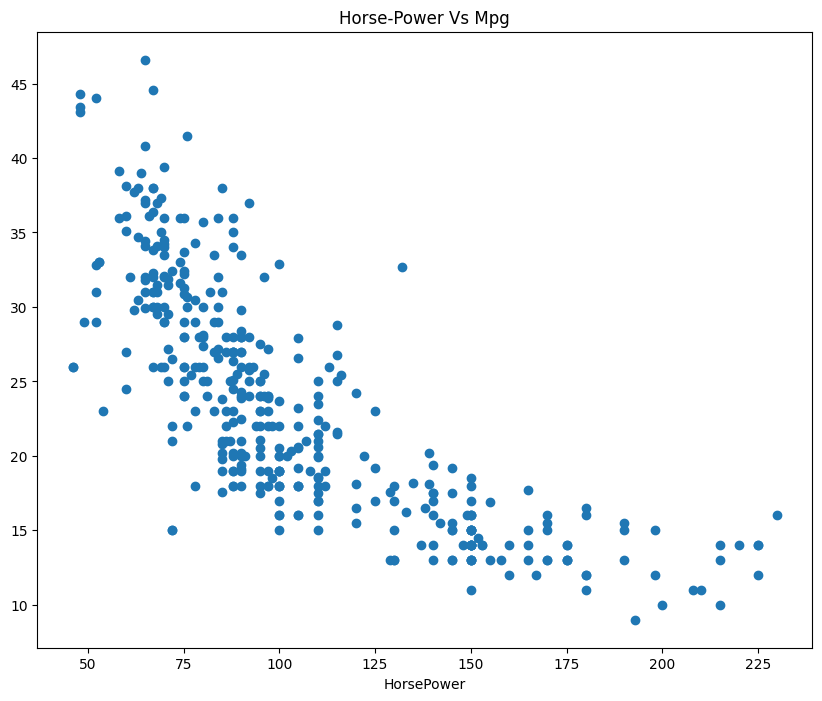

In [68]:
# in scatter plot we dont see any relation
plt.figure(figsize = (10,8))
plt.scatter(df['horsepower'],df['mpg'])
plt.title('Horse-Power Vs Mpg')
plt.xlabel('HorsePower')
plt.show()

In [69]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

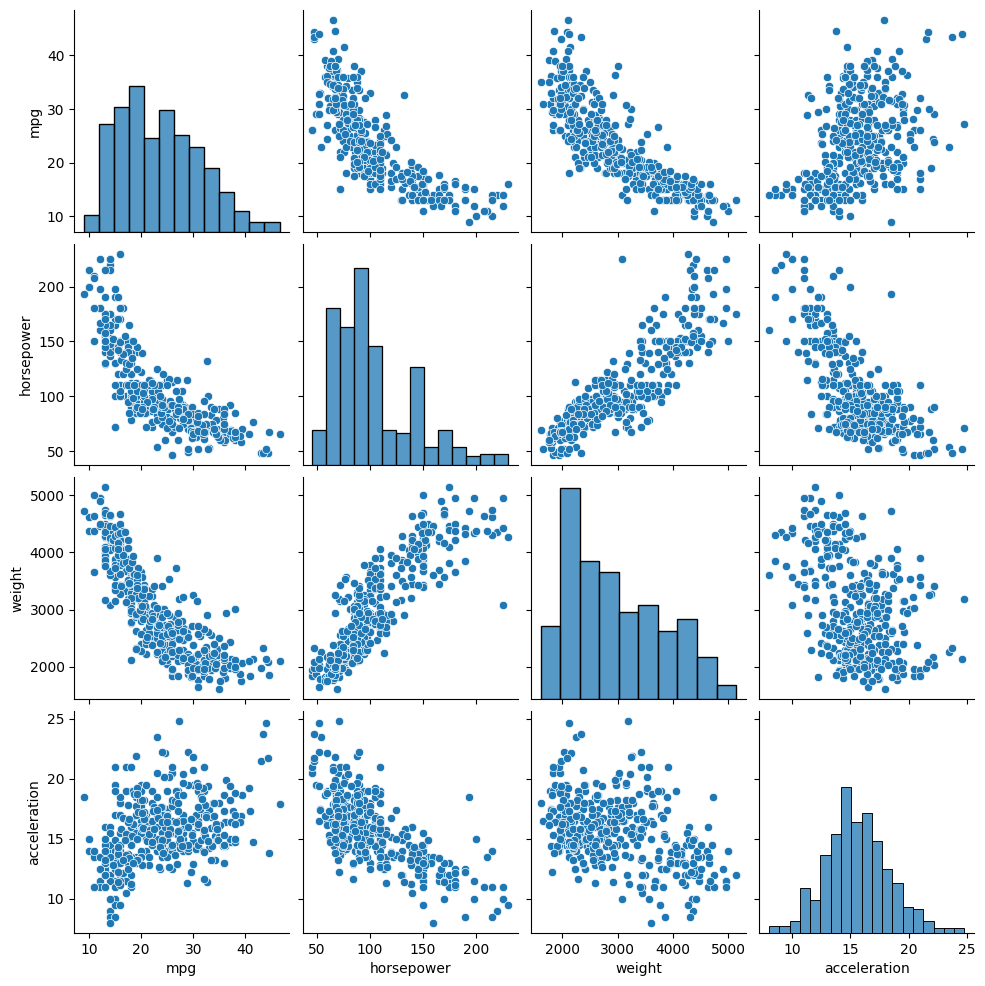

In [70]:
# pair plot for analysis

sns.pairplot(df[['mpg','horsepower','weight','acceleration']])
plt.show()

In [71]:
# removing null values
df = df.dropna(subset = numeric_col)


In [72]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0


In [73]:
# Clean The Column Name
df.columns = df.columns.str.strip()
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

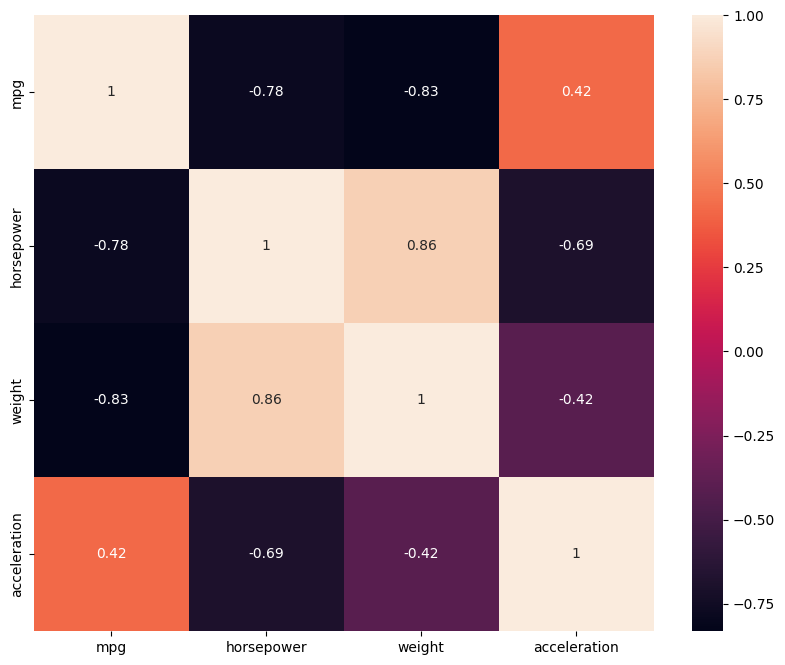

In [74]:
# corr relationship
plt.figure(figsize=(10,8))
sns.heatmap(df[['mpg','horsepower','weight','acceleration']].corr(),annot=True)
plt.show()

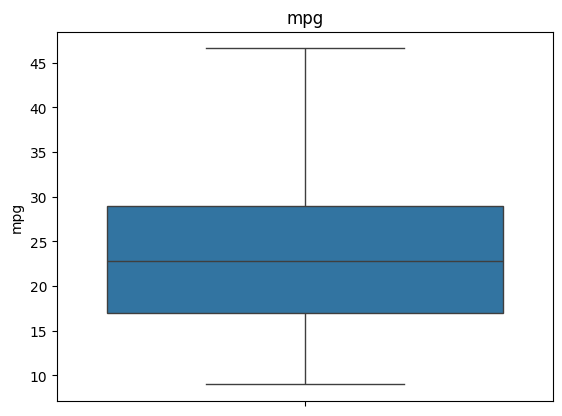

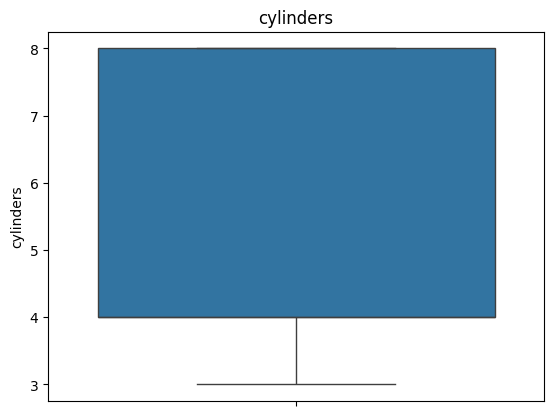

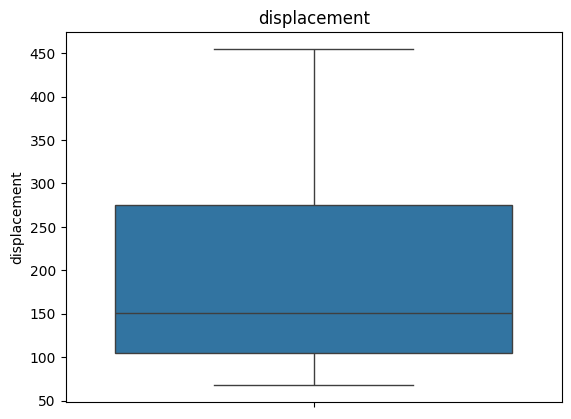

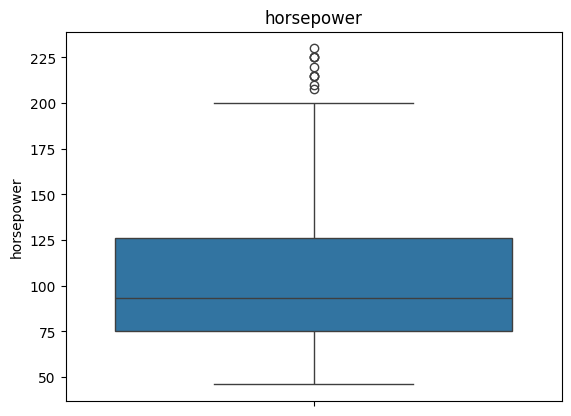

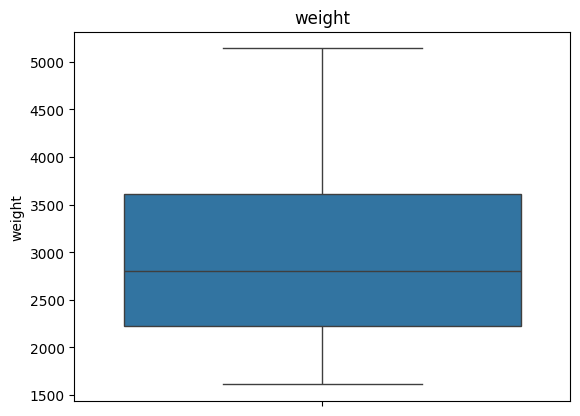

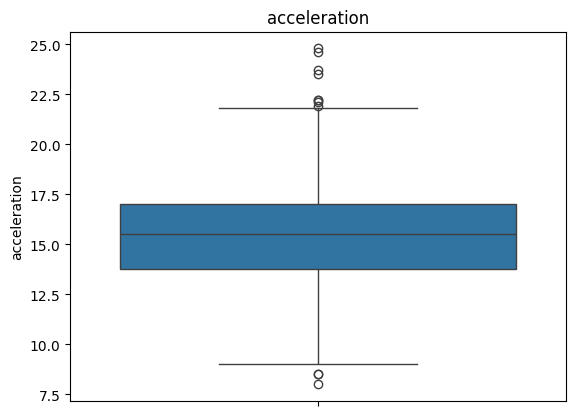

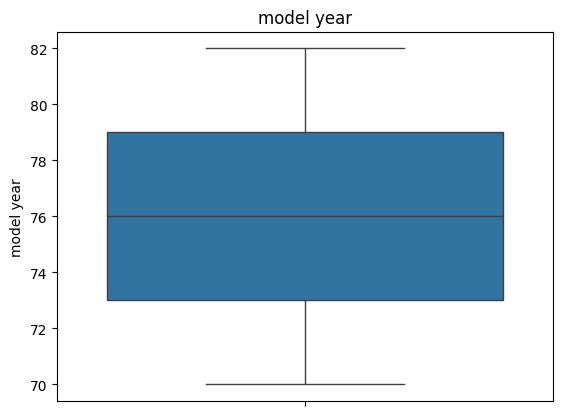

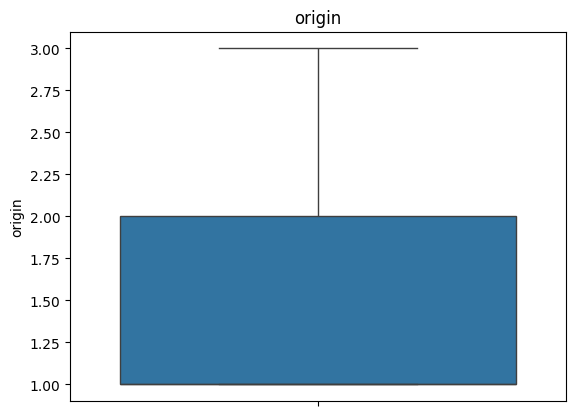

In [75]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [76]:
# Removing Outlier
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)

iqr = Q3-Q1

lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr
print(lower_bound)
print(upper_bound)

-1.5
202.5


In [77]:
# Removing Outlier
Q1 = df['acceleration'].quantile(0.25)
Q3 = df['acceleration'].quantile(0.75)

iqr = Q3-Q1

lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr
print(lower_bound)
print(upper_bound)

8.900000000000002
21.899999999999995


In [78]:
# Outlier Removed Data We Are Saving In The New Variable
df_cleaned = df[(df['horsepower']>=lower_bound)& (df['horsepower']<=upper_bound)]

In [79]:
df_cleaned = df[(df['acceleration']>=lower_bound)& (df['acceleration']<=upper_bound)]

In [80]:
df_cleaned

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [81]:
#Checking Shape For Comparison
df.shape

(392, 8)

In [82]:
df_cleaned.shape # Here WE see The 10 Rows Removed , WE removed The Outlier

(381, 8)

In [83]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [84]:
# Regression Before Outlier Removal
x = df[['horsepower', 'weight',
       'acceleration']]
y = df['mpg']

In [85]:
# splitting The data for traning And Testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=12)

In [86]:
before_train = LinearRegression()

In [87]:
before_train.fit(x_train,y_train)

LinearRegression()

In [88]:
y_before_pred = before_train.predict(x_test)

In [89]:
# Score Before removing The outlier
print(mean_squared_error(y_test,y_before_pred))
print(r2_score(y_test,y_before_pred))

22.241364417294932
0.7012094451228037


In [90]:
# Score After Removing The Outlier
X = df_cleaned[['acceleration','horsepower','weight']]
Y = df_cleaned['mpg']

In [91]:
# Spliting Data Into The Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [92]:
after_model = LinearRegression()
after_model.fit(X_train,Y_train)


LinearRegression()

In [93]:
y_after_pred = after_model.predict(X_test)

In [94]:
# Printing The Score After Removing Outlier
print(mean_squared_error(Y_test,y_after_pred))
print(r2_score(Y_test,y_after_pred))

19.82940585633946
0.6351513991707177


# Here We Can Say That The Outlier Can Affect The Prediction

In [95]:
# xg boost
model_xg = XGBRFRegressor(n_estimators=100)
model_xg.fit(X_train,Y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [96]:
y_pred_xg = model_xg.predict(X_test)

In [97]:
print(mean_squared_error(Y_test,y_pred_xg))
print(r2_score(Y_test,y_pred_xg))

16.626157363428224
0.6940891575288954


In [98]:
# Model Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train,Y_train)

RandomForestRegressor()

In [99]:
y_pred_rf = model_rf.predict(X_test)

In [100]:
y_train = model_rf.predict(X_test)

In [101]:
print(mean_squared_error(Y_test,y_pred_rf))
print(r2_score(Y_test,y_pred_rf))

19.236087794270833
0.6460680784883319


In [102]:
print(r2_score(Y_test,y_train))

0.6460680784883319


In [103]:
# Model Decision Tree
model_dt = DecisionTreeRegressor(max_depth=3)
model_dt.fit(X_train,Y_train)
y_pred_dt = model_dt.predict(X_test)

In [104]:
print(mean_squared_error(Y_test,y_pred_dt))
print(r2_score(Y_test,y_pred_dt))

20.93057287725969
0.6148906182994818


In [105]:
# We Can See The Best Model Here Performed Is LinearRegression
# WE Are saving The model In The PICkle File
with open('Auto-mpg_best_model.pkl','wb') as f:
  pickle.dump(after_model,f)